In [8]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
import plotly.offline as plyo
plyo.init_notebook_mode(connected=True)

Plot styling


In [9]:
style = 'seaborn-v0_8'
plt.style.use(style)
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

Data Import


In [10]:
filename = '../../Data/tr_eikon_eod_data.csv'
data = pd.read_csv(
    filename,
    index_col=0,
    parse_dates=True
    )

data.head(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.8
2010-01-05,30.625684,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7


Calculate 42-SMA and 252-SMA


In [11]:
ticker = 'AAPL.O'

df = pd.DataFrame(data[ticker]).rename(columns={ticker:'price'}).dropna()
df['SMA1'] = df['price'].rolling(window=42).mean()
df['SMA2'] = df['price'].rolling(window=252).mean()

df.tail(2)

,price,SMA1,SMA2
Date,,,
2017-10-30,166.72,157.597857,140.431528
2017-10-31,169.04,157.717857,140.651766


Plot SMA


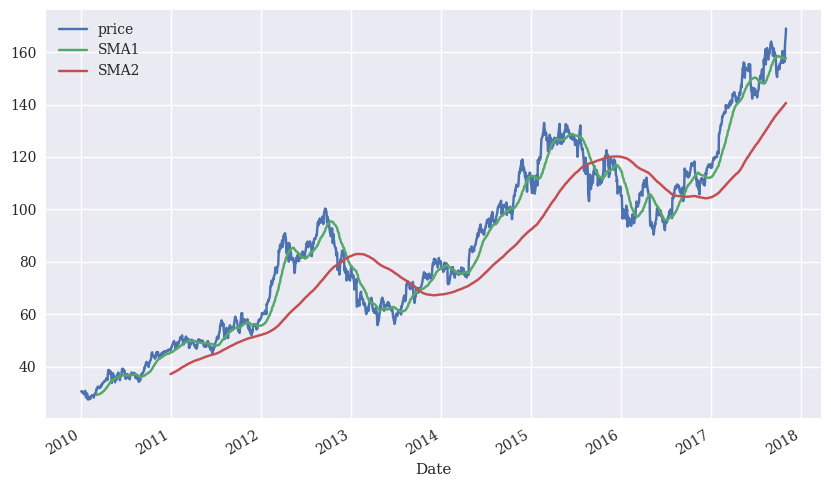

In [12]:
df[['price','SMA1','SMA2']].plot(figsize=(10,6))
plt.show()

Plot hypothetical Positions


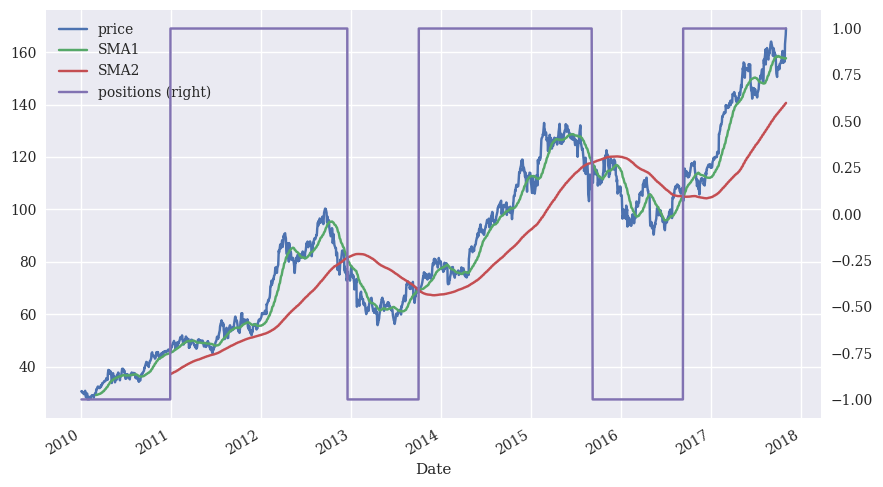

In [13]:
df['positions'] = np.where(df['SMA1'] > df['SMA2'],1,-1) # Go long if shorter SMA is greater than longer SMA


ax = df[['price','SMA1','SMA2','positions']].plot(figsize=(10,6),
                                                  secondary_y='positions') 
